In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >]], dtype=object))

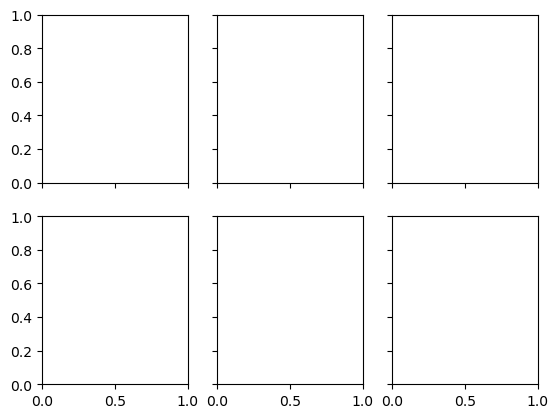

In [2]:
# Share both X and Y axes with all subplots
plt.subplots(2, 3, sharex='all', sharey='all')

In [4]:
#Reading GitHub dataset using url with pandas
seattle_dataset = "https://gist.githubusercontent.com/Srilekha24/94d3bd45c2799bd745373e08bd1bb539/raw/90426e642fca089e7c059275ca4b81f143c93d85/Seattle.csv"
seattle_dataset = pd.read_csv(seattle_dataset)

In [6]:
#Reading GitHub dataset using url with pandas
url="https://gist.githubusercontent.com/Srilekha24/7d8aeb6260096bffcaf72a538db7f082/raw/293ada65a8414eda0ebad48a3f42ef26249d75e7/Austria.csv"
austin_dataset = pd.read_csv(url)

In [7]:
#Reading columns from the both datasets
seattle_dataset['TAVG'] = seattle_dataset[['TMAX', 'TMIN']].mean(axis=1)
austin_dataset['TAVG'] = austin_dataset[['TMAX', 'TMIN']].mean(axis=1)

In [8]:
#Displaying top 5 rows
seattle_dataset.head()

,DATE,PRCP,TMAX,TMIN,TAVG
0,1/1/2017,0.43,37,28,32.5
1,1/2/2017,0.00,34,26,30.0
2,1/3/2017,0.00,33,21,27.0
3,1/4/2017,0.00,36,22,29.0
4,1/5/2017,0.00,35,21,28.0


In [9]:
#Displaying top 5 rows
austin_dataset.head()

,DATE,PRCP,TMAX,TMIN,TAVG
0,1/1/2017,0.0,73,53,63.0
1,1/2/2017,0.4,73,52,62.5
2,1/3/2017,0.0,75,44,59.5
3,1/4/2017,0.0,48,37,42.5
4,1/5/2017,0.0,62,34,48.0


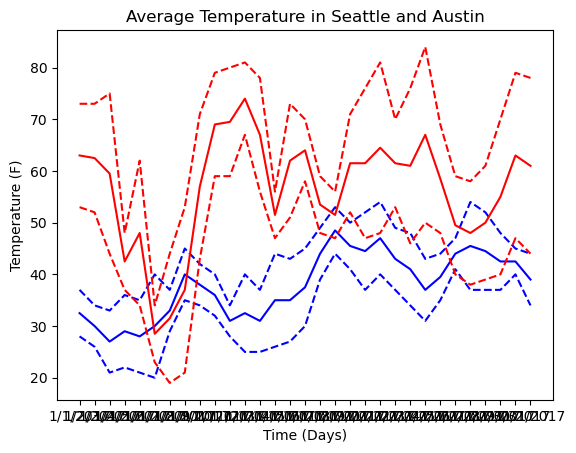

In [10]:
plt.plot(seattle_dataset["DATE"].tolist(), seattle_dataset["TMAX"].tolist(),color = "blue", linestyle="--")
plt.plot(seattle_dataset["DATE"].tolist(), seattle_dataset["TAVG"].tolist(), color = "blue",  linestyle="-")
plt.plot(seattle_dataset["DATE"].tolist(), seattle_dataset["TMIN"].tolist(), color = "blue",  linestyle="--")
plt.plot(austin_dataset["DATE"].tolist(), austin_dataset["TMAX"].tolist(), color = "red",  linestyle="--")
plt.plot(austin_dataset["DATE"].tolist(), austin_dataset["TAVG"].tolist(), color = "red",  linestyle="-")
plt.plot(austin_dataset["DATE"].tolist(), austin_dataset["TMIN"].tolist(), color = "red",  linestyle="--")
plt.title("Average Temperature in Seattle and Austin")
plt.xlabel("Time (Days)")
plt.ylabel("Temperature (F)")
plt.show()

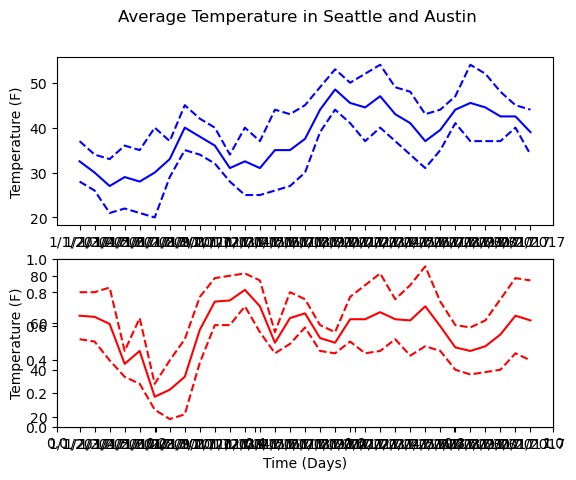

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Average Temperature in Seattle and Austin')

t = austin_dataset["DATE"].tolist()

ax1 = plt.subplot(211)
ax1.plot(seattle_dataset["DATE"].tolist(), seattle_dataset["TMAX"].tolist(),color = "blue", linestyle="--")
ax1.plot(seattle_dataset["DATE"].tolist(), seattle_dataset["TAVG"].tolist(),color = "blue", linestyle="-")
ax1.plot(seattle_dataset["DATE"].tolist(), seattle_dataset["TMIN"].tolist(),color = "blue", linestyle="--")
ax1.set_ylabel('Temperature (F)')

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(austin_dataset["DATE"].tolist(), austin_dataset["TMAX"].tolist(), color = "red",  linestyle="--")
ax2.plot(austin_dataset["DATE"].tolist(), austin_dataset["TAVG"].tolist(), color = "red",  linestyle="-")
ax2.plot(austin_dataset["DATE"].tolist(), austin_dataset["TMIN"].tolist(), color = "red",  linestyle="--")
ax2.set_ylabel('Temperature (F)')

plt.xlabel("Time (Days)")
plt.show()

In [12]:
pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   --------------- ----------------------- 41.0/100.0 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 100.0/100.0 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium
import pandas as pd
import altair as alt

In [15]:

url="https://gist.githubusercontent.com/Srilekha24/99f2eaba0739a81200cccde9511a4eb3/raw/d71495a65bf0aa8fb59db644bdf0bc00ce99a57e/IRIS.csv"
df = pd.read_csv(url)

In [16]:
base = alt.Chart(df).mark_point().encode(
    alt.Y('petal_length:Q'),
    alt.Color('species:N')
).properties(
    width=350,
    height=350
)

base.encode(x='sepal_length:Q') | base.encode(x='sepal_width:Q')

C:\Users\srile\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [17]:
brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(df).mark_point().encode(
    y='petal_length:Q',
    color=alt.condition(brush, 'species:N', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=350,
    height=350
)

base.encode(x='sepal_length:Q') | base.encode(x='sepal_width:Q')

C:\Users\srile\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\srile\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\srile\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

Linked Navigation

In [18]:
url = "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/2dec86ed-76ed-47a3-ae28-646db5c5b965/download/dublin.csv"
station_locations_bike = pd.read_csv(url)

In [34]:
station_locations_bike = station_locations_bike[["Name","Number","Address","Latitude", "Longitude"]]

In [35]:
station_locations_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       110 non-null    object 
 1   Number     110 non-null    int64  
 2   Address    110 non-null    object 
 3   Latitude   110 non-null    float64
 4   Longitude  110 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.4+ KB


In [19]:
station_locations_bike.head(20)

,Number,Name,Address,Latitude,Longitude
0,42,SMITHFIELD NORTH,Smithfield North,53.349562,-6.278198
1,30,PARNELL SQUARE NORTH,Parnell Square North,53.353462,-6.265305
2,54,CLONMEL STREET,Clonmel Street,53.336021,-6.262980
3,108,AVONDALE ROAD,Avondale Road,53.359405,-6.276142
4,56,MOUNT STREET LOWER,Mount Street Lower,53.337960,-6.241530
5,6,CHRISTCHURCH PLACE,Christchurch Place,53.343368,-6.270120
6,18,GRANTHAM STREET,Grantham Street,53.334123,-6.265436
7,32,PEARSE STREET,Pearse Street,53.344304,-6.250427
8,52,YORK STREET EAST,York Street East,53.338755,-6.262003
9,48,EXCISE WALK,Excise Walk,53.347777,-6.244239


In [20]:
map = folium.Map(location=[station_locations_bike.Latitude.mean(), station_locations_bike.Longitude.mean()], zoom_start=14, control_scale=True)

In [21]:
for index, location_info in station_locations_bike.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]]).add_to(map)

In [22]:
map

In [41]:
for index, location_info in station_locations_bike.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(map)

In [42]:
map

In [43]:
def dividing_dataset(number):
  if(number>50):
    return "blue"
  else:
    return "pink"

In [45]:
station_locations_bike['color'] = station_locations_bike['Number'].apply(dividing_dataset)

In [ ]:
bike_station_locations.head()

,Name,Number,Address,Latitude,Longitude,color
0,SMITHFIELD NORTH,42,Smithfield North,53.349562,-6.278198,pink
1,PARNELL SQUARE NORTH,30,Parnell Square North,53.353462,-6.265305,pink
2,CLONMEL STREET,54,Clonmel Street,53.336021,-6.262980,blue
3,AVONDALE ROAD,108,Avondale Road,53.359405,-6.276142,blue
4,MOUNT STREET LOWER,56,Mount Street Lower,53.337960,-6.241530,blue


In [47]:
for index, location_info in station_locations_bike.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"],icon = folium.Icon(color = "%s" % location_info["color"])).add_to(map)

In [48]:
map